In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams['font.size']=20

# Markov Chain
($S, P$) is a Markov Chain: 
- $S$: finite set of value the state can take
    - $S_{t}$: state at t
    - T: periods under simulation
    - $S_{0}$: initial state
    - $S_{T}$: terminal state
    - $H_{t} = \{S_{0},S_{1},S_{2}....S_{t}\}$: History until t
- $P$: fixed state transition probability matrix of dimension $|S|x|S|$
    - $ P_{s,s'} = Prob(S_{t+1}=s' | S_{t}=s)$: Probability of going from s to s' (time invariant)
    - $\sum_{s'} P_{s,s'} = 1$ for all $s$
- Markov Property / Memorylessness:
    - $Prob(S_{t+1}| S_{t})= Prob(S_{t+1}| H_{t})$
    - $S_{t}$ is sufficient statistic for $H_{t}$ and summarises all information about process at t

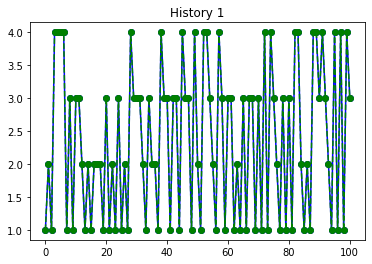

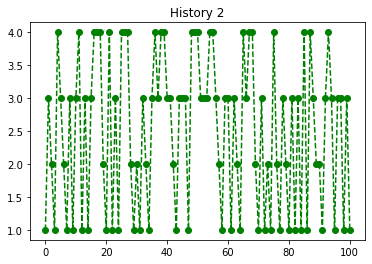

In [2]:
S = [1, 2, 3, 4] 
P = [[0, 0.2, 0.4, 0.4],
     [0.9, 0.1, 0, 0], 
     [0.5, 0.2, 0.2, 0.1],
     [0.1, 0.2, 0.3, 0.4]]
S = np.array(S)
P = np.array(P)
s0 = 1 
T = 100
H = np.empty(T+1)
H[0] = s0 

# Simulations
for t in range(T):
    H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
plt.plot(H, label = 'History 1', marker = 'o', c = 'b')

plt.plot(H, 'go--')
plt.title('History 1')
plt.show()

for t in range(T):
    H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
plt.plot(H, 'go--')
plt.title('History 2')
plt.show()

# Markov Reward Process
($S, P, d, R$) is a Markov Reward Process: 
- ($S, P$) is Markov Chain
- $d \in [0,1] $: Discounting parameter
- $R$: Reward Space is finite set of values that reward can take (1:1 map with state)
    - $R_{t}$: Instantanous Reward in period t, is a function of state $S_{t}$
    - $G_{t}$ = $\sum_{k=0}^{\infty} d^k R_{t+k}$: Return is the discounted sum of current and future rewards at t
    - $V_{t}(s) =  E[G_{t}| S_{t}=s]$ State-value is the expected return (over realisations) from state s at time t
- Bellman Equation
    - Finite Horizon: $V_{t}(s) = R_{t} + d * E[V_{t+1}(s')| S_{t}=s]$
    - Infinite Horizon: $V(s) = R(s) + d * E[V(s')|s] = R(s) + d \sum_{s'}P_{s,s'}V(s')$

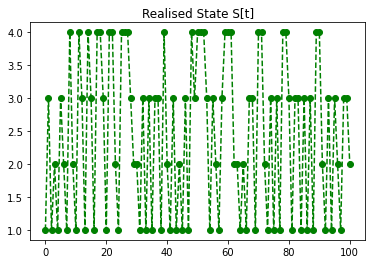

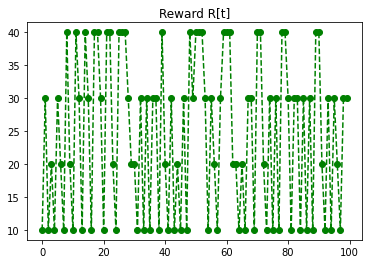

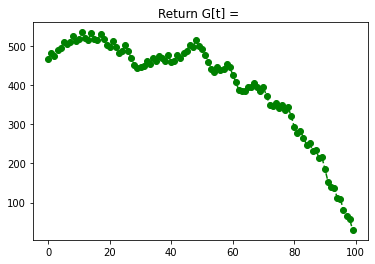

In [3]:
RS = [10, 20, 30, 40] # reward for each state
R = np.zeros(T).astype(int)
G = np.zeros(T).astype(int)   
d = 0.95

def discountedSum(R, d):
    sum = 0
    for i, r in enumerate(R):
        sum += R[i] * (d ** i)
    return sum

for t in range(T):
    H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
    R[t] = RS[np.where(S == H[t])[0][0]]

for t in range(0, T, 1):
    G[T-1-t] = discountedSum(R[T-1-t:T], d)

plt.plot(H, 'go--')
plt.title('Realised State S[t]')
plt.show()

plt.plot(R, 'go--')
plt.title('Reward R[t]')
plt.show()

plt.plot(G, 'go--')
plt.title('Return G[t] = ')
plt.show()

#### Methods to calculate $V_{t}(s)$ for MRP
$V_{t}(s)$ : Expected Return from state s, at time t
- (Analytical) For infinite horizon case we can just solve a linear system of equations: $V = R + d*P*V$
- (Monte Carlo) For each s in S, we simulate $i = 1,2,3... N$ realisations with $S_{0}^{i} = s$, collect $G_{t}^{i}$, and average across $i$ to get $V_{t}(s)$
    - if T is large, $V_{0}(s)$ will be close to infinite horizon estimate


In [4]:
# Analytical
V = np.dot(np.linalg.inv(np.eye(P.shape[0]) - d * P), RS)
print(S)
print(V)

[1 2 3 4]
[479.11092159 474.74015244 488.9567844  508.17556463]


[1 2 3 4]
[481.26 477.28 485.11 503.96]


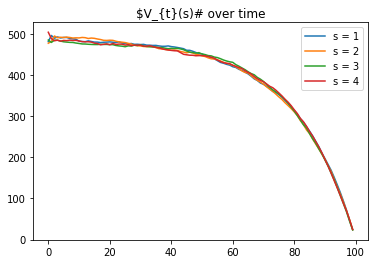

In [5]:
# Monte Carlo
N = 100
V = np.empty((T, S.shape[0]))
G_ = np.empty((T, S.shape[0], N))
for i_s, s0 in enumerate(S):
    for i_n in range(N):
        R = np.zeros(T).astype(int)
        G = np.zeros(T).astype(int)
        H = np.zeros(T+1).astype(int)
        H[0] = s0 
        for t in range(T):
            H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
            R[t] = RS[np.where(S == H[t])[0][0]]
        for t in range(0, T, 1):
            G[T-1-t] = discountedSum(R[T-1-t:T], d)
        G_[:, i_s, i_n] = G
    for t in range(T):
        V[t, i_s] = np.mean(G_[t, i_s, :])

for i, s in enumerate(S):
    plt.plot(V[:, i], label = f's = {s}')
plt.legend()
plt.title('$V_{t}(s)# over time')
plt.plot()

print(S)
print(V[0, :])

# Markov Decision Process
$(S, P, d, R, A)$ is a Markov Decision Process and $\pi$ is a policy
- $A$ is action space
    - $A_{t}$: action at $t$
- $P^a$: is state transition matrix for action $a \in A$ (fixed)
    - $P^a_{s,s'} = Prob(S_{t+1}=s'|S_{t}=s, A_{t}=a)$ 
- $R^a$: is reward space for action $a \in A$ (fixed)
    - $R^a_{s}$: Reward for action $a$ in state $s$ 

In [6]:
# Simple MDP
S = np.array([0, 2]) 
A = np.array([100, 200])
P = np.array([[[0.5, 0.5],   # P given a=0
              [0.8, 0.2]], 
     
             [[0.2, 0.8],   # P given a=0
              [0.4, 0.6]]] 
 
             )
R = np.array([[10, 90], 
               [5, 30]])
d = 0.95
s0 = 0
pi = np.array([[0.5, 0.5], 
               [0.5, 0.5]])

In [7]:
# Complex MDP
S = np.array([0, 1, 2]) # three states
A = np.array([100, 200, 300]) # three decisions
P = np.array([[[0.5, 0.4, 0.1],   # P given a=0
              [0.8, 0.1, 0.1],
              [0.2, 0.1, 0.7]], 
     
             [[0.2, 0.2, 0.6],   # P given a=0
              [0.4, 0.3, 0.3],
              [0.5, 0.4, 0.1]], 
 
             [[0.1, 0.7, 0.2],   # P given a=0
              [0.05, 0.9, 0.05],
              [0.3, 0.2, 0.5]],
             ])
R = np.array([[10, 20, 90], 
               [5, 30, 80],
              [4, 4, 110]])
d = 0.95
s0 = 0
pi = np.array([[0.3, 0.5, 0.2], 
               [0.7, 0.2, 0.1], 
              [0.3, 0.4, 0.3]])

 
$\pi$ is any policy matrix of dimension $|A|x|S|$
 - $\pi_{a,s} = Prob(A_{t}=a|S_{t}=s$): is probability that agent takes action $a$ at state $s$
 - $P^\pi_{s,s'} = \sum_{a} \pi(a|s)P^a_{s,s'}$: transition probability from $s$ to $s'$ under given policy
 - $R^\pi_{s} = \sum_{a} \pi(a|s)R^a_{s}$: Expected reward from policy $\pi$ at $s$
 - $G^\pi_{t} = \sum_{k=0}^{\infty} d^k R^\pi_{t+k}$: Sum of discounted rewards from policy $\pi$ at $s$
 - $V^\pi(s) = E[G^\pi_{t} | S_{t} = s]$: State-value under policy $\pi$ (infinite horizon)
 - $Q^\pi(a, s) = E[G^\pi_{t} | S_{t} = s, A_{t} = a]$: State-action value under policy $\pi$
 - Link between $V$ and $Q$:
     - $V^\pi(s) = \sum_{a} \pi(a|s) Q^\pi(a, s) $

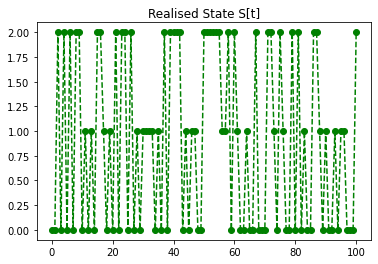

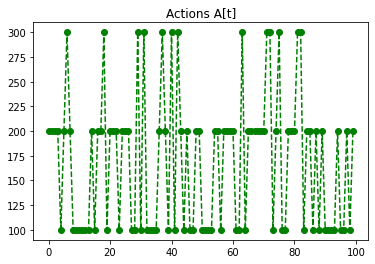

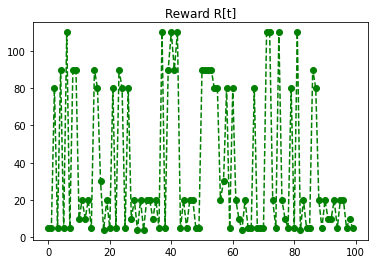

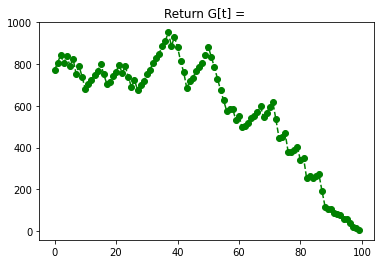

In [8]:
# Histories
HS = np.zeros(T+1).astype(int)
HR = np.zeros(T).astype(int)
HA = np.zeros(T).astype(int)
HG = np.zeros(T).astype(int)
HV = np.zeros(T).astype(int)
HS[0] = s0

for t in range(T):
    HA[t] = np.random.choice(A, p = pi[np.where(S == HS[t])][0])
    HS[t+1] = np.random.choice(S, p = P[np.where(A == HA[t]), np.where(S == HS[t]), :][0][0])
    HR[t] = R[np.where(A == HA[t]), np.where(S == HS[t])]
for t in range(0, T, 1):
    HG[T-1-t] = discountedSum(HR[T-1-t:T], d)
    

plt.plot(HS, 'go--')
plt.title('Realised State S[t]')
plt.show()

plt.plot(HA, 'go--')
plt.title('Actions A[t]')
plt.show()

plt.plot(HR, 'go--')
plt.title('Reward R[t]')
plt.show()

plt.plot(HG, 'go--')
plt.title('Return G[t] = ')
plt.show()

In [9]:
# Monte Carlo
N = 200
V = np.empty((T, S.shape[0]))
Q = np.empty((T, A.shape[0], S.shape[0]))
G_ = np.empty((T, S.shape[0], N))
for i_s, s0 in enumerate(S):
    for i_n in range(N):
        HS = np.zeros(T+1).astype(int)
        HR = np.zeros(T).astype(int)
        HA = np.zeros(T).astype(int)
        HG = np.zeros(T).astype(int)
        HV = np.zeros(T).astype(int)
        HS[0] = s0
        for t in range(T):
            HA[t] = np.random.choice(A, p = pi[np.where(S == HS[t])][0])
            HS[t+1] = np.random.choice(S, p = P[np.where(A == HA[t]), np.where(S == HS[t]), :][0][0])
            HR[t] = R[np.where(A == HA[t]), np.where(S == HS[t])]
        for t in range(0, T, 1):
            HG[T-1-t] = discountedSum(HR[T-1-t:T], d)
        G_[:, i_s, i_n] = HG
    for t in range(T-1):
        V[t, i_s] = np.mean(G_[t, i_s, :])
        for i_a, a in enumerate(A):
            Q[t, i_a, i_s] = R[i_a, i_s] + d * np.sum(np.dot(P[i_a, i_s, :], V[t+1, i_s]))

Text(0.5, 1.0, '$V_{t}(s)$ over time')

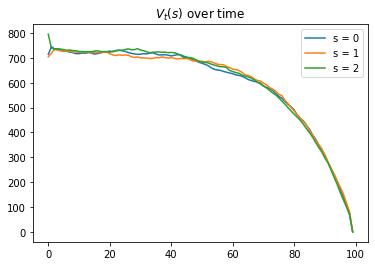

In [10]:
for i, s in enumerate(S):
    plt.plot(V[:, i], label = f's = {s}')
plt.legend()
plt.title('$V_{t}(s)$ over time')
#plt.plot()

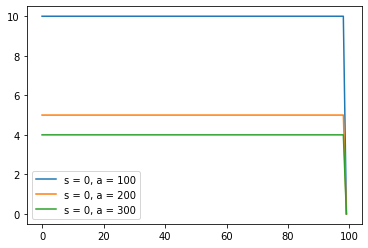

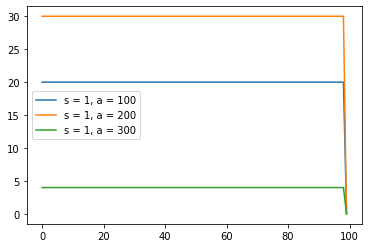

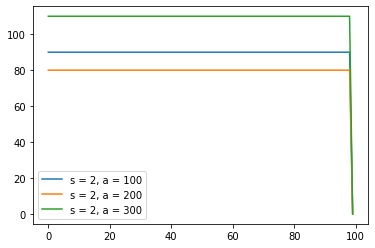

In [11]:
for i, s in enumerate(S):
    for j, a in enumerate(A):
        plt.plot(Q[:, j, i], label = f's = {s}, a = {a}')
    plt.legend()
    plt.show()

Bellman Equations for a given $\pi$
- $V^\pi(s) = \sum_{a} \pi(a|s) \left(R^a(s) + d \sum_{s'}P^a_{s,s'}V(s')\right)$
- $Q^\pi(s, a) = R^a_{s} + d * \sum_{s'} P^a_{s,s'} \left( \sum_{a'}\pi(a|s) Q^\pi(s', a') \right)$

Optimal Value and Policy
- $V^*(s) = max_{\pi} V^\pi(s)$
- $Q^*(s, a) = max_{\pi} Q^\pi(s, a)$
- $\pi^* = argmax_{\pi} V^\pi(s)$

Solution Methods to find $V^*, Q^*, \pi^*$
- Analytical (case under no randomness and infinite horizon)
- Dynamic Programming (when P is known, "model specific")
    - Policy Iteration
    - Value Function Iteration
- Reinforecement Learning (when P is unknown and must be learnt, "model free")
    - Q-Learning
